# Task 1

In [1]:
import pandas as pd
import numpy as np
from fastai.structured import *
from nltk.corpus import words
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, roc_curve, auc
from sklearn.naive_bayes import BernoulliNB

/Users/sage/anaconda3/envs/py36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/sage/anaconda3/envs/py36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/sage/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
data = pd.read_csv('data/test_dataset.csv')

In [3]:
data.head()

,username,password,publisher,register_datetime,domain,partner,is_fake
0,glenister,38cli9z,pub_97409,2017-01-01 22:01:35,d_42_com,par_17,0
1,kim12349,password,pub_22326,2017-01-01 22:07:26,d_42_com,par_58,0
2,bxalcbmah,l84o1aa,pub_85995,2017-01-01 22:09:22,d_63_com,par_29,0
3,chokeme,895263,pub_16333,2017-01-01 22:10:28,d_42_com,par_17,0
4,umbriel,requete,pub_81878,2017-01-01 22:14:58,d_31_com,par_29,0


In [4]:
data.describe()

,is_fake
count,1000000.000000
mean,0.076012
std,0.265017
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [5]:
add_datepart(data, 'register_datetime')

In [6]:
data.describe()

,is_fake,register_datetimeYear,register_datetimeMonth,register_datetimeWeek,register_datetimeDay,register_datetimeDayofweek,register_datetimeDayofyear,register_datetimeElapsed
count,1000000.000000,1000000.0,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1.000000e+06
mean,0.076012,2017.0,6.367023,25.795342,15.380359,3.101320,177.798026,1.498554e+09
std,0.265017,0.0,3.309683,14.432249,8.778340,2.048343,100.983076,8.725263e+06
min,0.000000,2017.0,1.000000,1.000000,1.000000,0.000000,1.000000,1.483229e+09
25%,0.000000,2017.0,3.000000,13.000000,8.000000,1.000000,90.000000,1.490981e+09
50%,0.000000,2017.0,7.000000,26.000000,15.000000,3.000000,182.000000,1.498870e+09
75%,0.000000,2017.0,9.000000,38.000000,23.000000,5.000000,260.000000,1.505659e+09
max,1.000000,2017.0,12.000000,52.000000,31.000000,6.000000,364.000000,1.514631e+09


In [7]:
np.sum(data['is_fake']), (data['is_fake']).count()

(76012, 1000000)

In [8]:
# create english dictionary for faster lookup
dict_en = {word: "" for word in words.words()}

In [9]:
# extract information about the username
data['username_isnumeric'] = data['username'].astype(str).apply(lambda x: x.isdigit())
data['username_isletters'] = data['username'].astype(str).apply(lambda x: x.isalpha())
data['username_onlylower'] = data['username'].astype(str).apply(lambda x: x.islower())
data['username_onlyupper'] = data['username'].astype(str).apply(lambda x: x.isupper())
data['username_is_eng_word'] = data['username'].astype(str).apply(lambda x: x in dict_en)

In [10]:
# extract information about the password
data['pw_isletters'] = data['password'].astype(str).apply(lambda x: x.isalpha())
data['pw_isnumeric'] = data['password'].astype(str).apply(lambda x: x.isdigit())
data['pw_onlylower'] = data['password'].astype(str).apply(lambda x: x.islower())
data['pw_onlyupper'] = data['password'].astype(str).apply(lambda x: x.isupper())
data['pw_is_eng_word'] = data['password'].astype(str).apply(lambda x: x in dict_en)

In [11]:
data.corr()

,is_fake,register_datetimeYear,register_datetimeMonth,register_datetimeWeek,register_datetimeDay,register_datetimeDayofweek,register_datetimeDayofyear,register_datetimeIs_month_end,register_datetimeIs_month_start,register_datetimeIs_quarter_end,...,username_isnumeric,username_isletters,username_onlylower,username_onlyupper,username_is_eng_word,pw_isletters,pw_isnumeric,pw_onlylower,pw_onlyupper,pw_is_eng_word
is_fake,1.000000,NaN,0.020942,0.021410,0.020747,-0.006644,0.022506,-0.000025,-0.010949,0.005679,...,0.065307,0.000053,-0.065818,NaN,-0.022570,-0.013849,0.010819,-0.010811,NaN,-0.018673
register_datetimeYear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
register_datetimeMonth,0.020942,NaN,1.000000,0.981807,-0.008604,0.000022,0.996204,-0.033480,-0.005629,-0.011966,...,-0.000373,0.000796,0.000537,NaN,0.000542,-0.000471,0.000215,-0.000222,NaN,-0.000378
register_datetimeWeek,0.021410,NaN,0.981807,1.000000,0.064737,-0.010907,0.984546,-0.008742,0.013022,-0.000731,...,-0.000572,0.001116,0.000722,NaN,0.000693,-0.000161,0.000316,-0.000315,NaN,-0.000464
register_datetimeDay,0.020747,NaN,-0.008604,0.064737,1.000000,-0.034141,0.078197,0.293043,-0.308248,0.152792,...,0.002291,0.001199,-0.002222,NaN,0.000807,0.000601,0.001108,-0.001144,NaN,-0.001134
register_datetimeDayofweek,-0.006644,NaN,0.000022,-0.010907,-0.034141,1.000000,-0.002829,-0.030744,0.014502,0.052699,...,-0.001966,-0.000353,0.002124,NaN,-0.001053,0.000393,0.000169,-0.000128,NaN,-0.000265
register_datetimeDayofyear,0.022506,NaN,0.996204,0.984546,0.078197,-0.002829,1.000000,-0.007884,-0.032500,0.001111,...,-0.000170,0.000889,0.000340,NaN,0.000596,-0.000424,0.000318,-0.000327,NaN,-0.000481
register_datetimeIs_month_end,-0.000025,NaN,-0.033480,-0.008742,0.293043,-0.030744,-0.007884,1.000000,-0.032433,0.520548,...,-0.000559,0.000409,0.000470,NaN,0.000738,0.000845,-0.000688,0.000576,NaN,-0.001927
register_datetimeIs_month_start,-0.010949,NaN,-0.005629,0.013022,-0.308248,0.014502,-0.032500,-0.032433,1.000000,-0.016883,...,-0.000346,0.000370,0.000363,NaN,0.000269,0.000586,-0.001179,0.001169,NaN,0.000997
register_datetimeIs_quarter_end,0.005679,NaN,-0.011966,-0.000731,0.152792,0.052699,0.001111,0.520548,-0.016883,1.000000,...,0.001205,-0.000809,-0.001312,NaN,-0.000573,-0.001111,0.000704,-0.000916,NaN,-0.001329


In [12]:
# unique entries per column
data.nunique()

username                             918559
password                             681133
publisher                              9244
domain                                   27
partner                                  98
is_fake                                   2
register_datetimeYear                     1
register_datetimeMonth                   12
register_datetimeWeek                    52
register_datetimeDay                     31
register_datetimeDayofweek                7
register_datetimeDayofyear              362
register_datetimeIs_month_end             2
register_datetimeIs_month_start           2
register_datetimeIs_quarter_end           2
register_datetimeIs_quarter_start         2
register_datetimeIs_year_end              1
register_datetimeIs_year_start            2
register_datetimeElapsed             980123
username_isnumeric                        2
username_isletters                        2
username_onlylower                        2
username_onlyupper              

Take a look at columns with less than 3 different values

In [13]:
[(el,data[el].unique()) for el in data.nunique().index if data[el].nunique() < 3]

[('is_fake', array([0, 1])),
 ('register_datetimeYear', array([2017])),
 ('register_datetimeIs_month_end', array([False,  True])),
 ('register_datetimeIs_month_start', array([ True, False])),
 ('register_datetimeIs_quarter_end', array([False,  True])),
 ('register_datetimeIs_quarter_start', array([ True, False])),
 ('register_datetimeIs_year_end', array([False])),
 ('register_datetimeIs_year_start', array([ True, False])),
 ('username_isnumeric', array([False,  True])),
 ('username_isletters', array([ True, False])),
 ('username_onlylower', array([ True, False])),
 ('username_onlyupper', array([False])),
 ('username_is_eng_word', array([False,  True])),
 ('pw_isletters', array([False,  True])),
 ('pw_isnumeric', array([False,  True])),
 ('pw_onlylower', array([ True, False])),
 ('pw_onlyupper', array([False])),
 ('pw_is_eng_word', array([False,  True]))]

In [14]:
# list of categorical variables, variables with only one value are left out
categorical_vars = ['publisher', 'domain', 'partner', 'register_datetimeMonth', 'register_datetimeMonth',
                   'register_datetimeWeek', 'register_datetimeWeek', 'register_datetimeDay', 'register_datetimeDayofweek',
                   'register_datetimeDayofyear', 'username_isnumeric', 'username_isletters', 'username_onlylower',
                   'username_is_eng_word', 'pw_isletters', 'pw_isnumeric', 'pw_onlylower', 'pw_is_eng_word']

continuous_vars = ['register_datetimeElapsed']
skip_cols = ['username', 'password']

Encode categorical variables with ones and zeros. 'password' and 'username' are replaced by newly created columns.

In [15]:
training=pd.get_dummies(data, columns=categorical_vars, drop_first=True)

Transform continuous columns

In [16]:
training[continuous_vars] = StandardScaler().fit_transform(training[continuous_vars])

In [17]:
training.drop(skip_cols, axis=1, inplace=True)

In [18]:
training.head()

,is_fake,register_datetimeYear,register_datetimeIs_month_end,register_datetimeIs_month_start,register_datetimeIs_quarter_end,register_datetimeIs_quarter_start,register_datetimeIs_year_end,register_datetimeIs_year_start,register_datetimeElapsed,username_onlyupper,...,register_datetimeDayofyear_363,register_datetimeDayofyear_364,username_isnumeric_True,username_isletters_True,username_onlylower_True,username_is_eng_word_True,pw_isletters_True,pw_isnumeric_True,pw_onlylower_True,pw_is_eng_word_True
0,0,2017,False,True,False,True,False,True,-1.747308,False,...,0,0,0,1,1,0,0,0,1,0
1,0,2017,False,True,False,True,False,True,-1.747268,False,...,0,0,0,0,1,0,1,0,1,1
2,0,2017,False,True,False,True,False,True,-1.747255,False,...,0,0,0,1,1,0,0,0,1,0
3,0,2017,False,True,False,True,False,True,-1.747247,False,...,0,0,0,1,1,0,0,1,0,0
4,0,2017,False,True,False,True,False,True,-1.747216,False,...,0,0,0,1,1,0,1,0,1,0


In [21]:
del data

In [22]:
def get_data_chunks(seq, target, size):
    return ((seq[pos:pos + size], target[pos:pos + size]) for pos in range(0, len(seq), size))

def plot_roc_curve(fpr, tpr):
    plt.figure(1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label=' (area = {:.3f})'.format(auc(fpr, tpr)))
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')
    plt.show()

Start training
f1-score: 0.43800393861702525, precision: 0.5032875074716079, recall: 0.38771214313906066


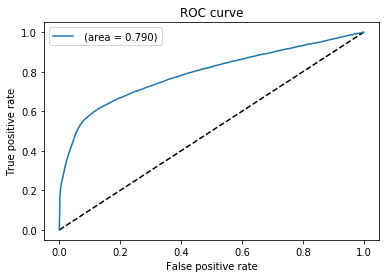

f1-score: 0.4770625174003155, precision: 0.4502773722627737, recall: 0.5072358900144718


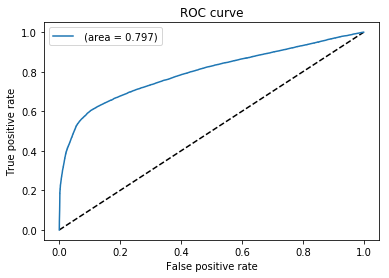

f1-score: 0.48677945800269506, precision: 0.4467652393777827, recall: 0.5346664912511512


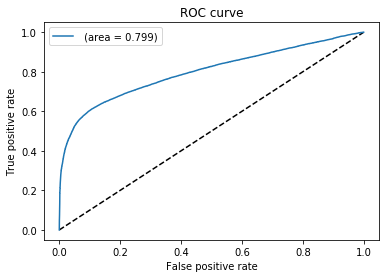

f1-score: 0.48694882760654773, precision: 0.44137304175800673, recall: 0.5430206551769504


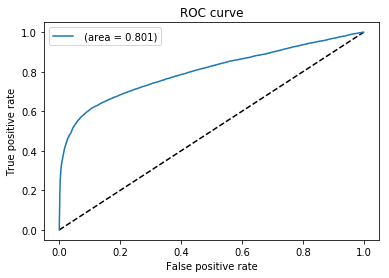

f1-score: 0.4893399233761296, precision: 0.44052445895424147, recall: 0.5503223260097355


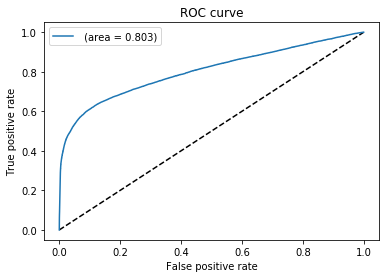

f1-score: 0.4892445062909491, precision: 0.4373833713456355, recall: 0.5550585449282989


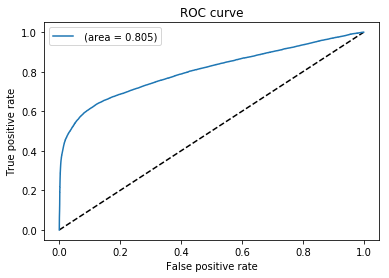

f1-score: 0.48937889632879245, precision: 0.4359765504473928, recall: 0.557689777660834


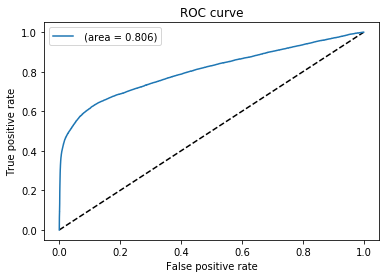

f1-score: 0.49063120628615836, precision: 0.4361598689933985, recall: 0.5606499144849362


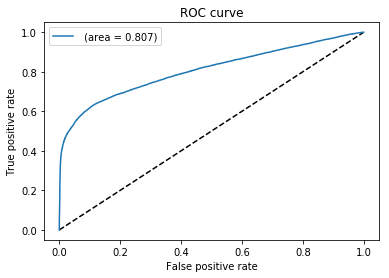

f1-score: 0.49147915050148, precision: 0.4363868333758612, recall: 0.5624917773977108


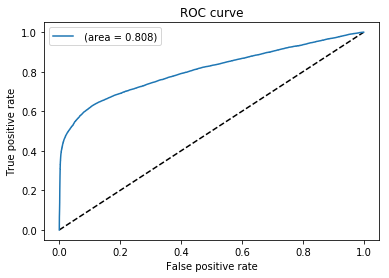

f1-score: 0.491699876716649, precision: 0.43578797580932055, recall: 0.564070517037232


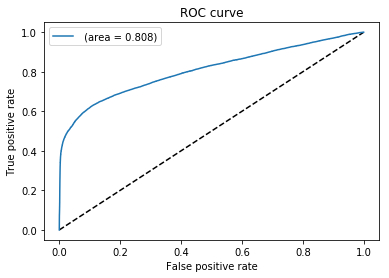

f1-score: 0.49242662848962054, precision: 0.4359884398925113, recall: 0.565649256676753


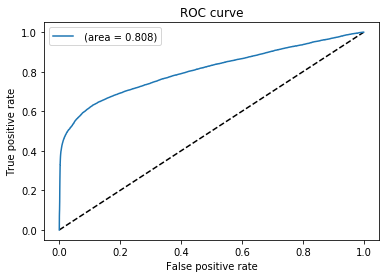

f1-score: 0.493020594965675, precision: 0.43617775078449234, recall: 0.5668990922247072


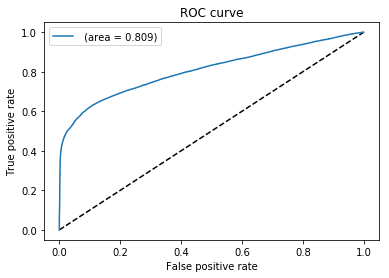

f1-score: 0.49255349500713264, precision: 0.4349052801289803, recall: 0.5678200236810946


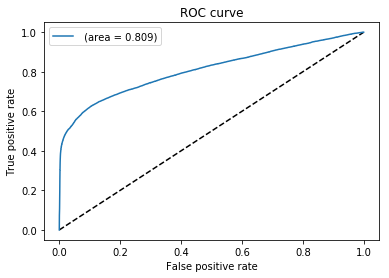

f1-score: 0.49181448053981713, precision: 0.43356257216003213, recall: 0.5681489277726615


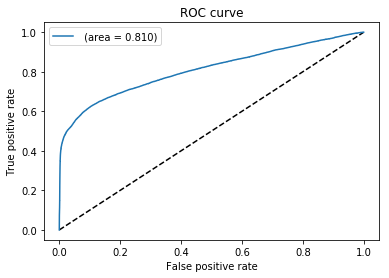

f1-score: 0.49246460214808696, precision: 0.43434343434343436, recall: 0.5685436126825417


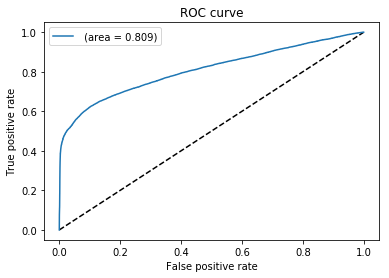

f1-score: 0.4932842843699205, precision: 0.4353888749056129, recall: 0.5689382975924221


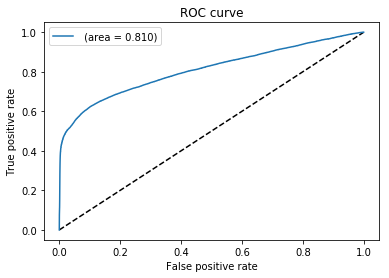

In [23]:
print('Start training')
clf = BernoulliNB()
X_train, X_test, y_train, y_test = train_test_split(training.drop('is_fake', axis=1), training['is_fake'], test_size=0.2, random_state=42, stratify=training['is_fake'])
for i, minibatch in enumerate(get_data_chunks(X_train, y_train, 50000)):
    clf.partial_fit(minibatch[0], minibatch[1], classes=[0, 1])
    print(f'f1-score: {f1_score(y_test, clf.predict(X_test))}, precision: {precision_score(y_test, clf.predict(X_test))}, recall: {recall_score(y_test, clf.predict(X_test))}')
    fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
    plot_roc_curve(fpr, tpr)

f1-score: 0.4932842843699205, precision: 0.4353888749056129, recall: 0.5689382975924221


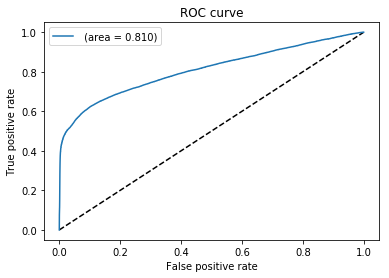

In [24]:
print(f'f1-score: {f1_score(y_test, clf.predict(X_test))}, precision: {precision_score(y_test, clf.predict(X_test))}, recall: {recall_score(y_test, clf.predict(X_test))}')
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plot_roc_curve(fpr, tpr)

To improve the naive bayes classifier a GridSearch can be performed on part of the data to tune the alpha value (for Laplace smoothing).
To improve the predictions we could train additional models such as the MLPClassifier or SGDClassifier with log loss, which can both be be fitted with 'partial_fit', and average the predictions.


## Task 2, Case A

The maximum bid depends on the value of the specific user for the "Super dating company". We have to estimate the probabilty that the user 
registers after seeing the ad. And we have to estimate the value this user has after he registers for the company.
We only focus on the direct economic value that the company receives from the user in form of subscription fees. In general, it
is also important for dating apps to aquire attractive users.

The probabilty for registration is the product of the click rate and the conversion rate:

$p_{register} = p_{ctr} * p_{cr}$

Depending on the amount of data per level we can calculate $p_{ctr}$ and $p_{cr}$ per domain or per placement as the mean over the last days or weeks. This values can be adjusted with user information, perhaps the data would show that there exist on average higher click rates for mobile phones than desktops.
If it is a second price auction we would bid our calculated maximum price. In the case of a first price auction we would bid less to have a profit margin. We would try to maximize the equation:

   $(p_{ctr} * p_{cr} * value\_bid - bid) * p_{win}(bid)$
   
To estimate $p_{win}(bid)$ past bids and their succes rate for this site and placement can be used.
$p_{ctr}$, $p_{cr}$ and $p_{win}$ will be updated regularly. To evaluate the model we can calcuate the sum over all bids for e. g. the past week: 

$(wins*ctr * cr * value\_bid - bid)$. 

The value of the bid depends unfortunately on the future and can be only
estimated. Only after the customer has cancelled the subscription we would have a final value.
This sum does not capture the loss we suffered by bidding strategically lower than the maximum bid to increase the profit margin:
$(ctr * cr * value\_bid > maximum\_bid)$. 

But this loss is difficult to measure since we know the winning price only in case we 
win the auction ourselves. 

To compare different algorithms we can run A/B tests, at the beginning only for specific domains
to see which strategy increases the margin $(ctr * cr * value\_bid - bid)$ most successfully.
To further develop the model the probalities $p_{ctr}$, $p_{cr}$ and $p_{win}$ can be estimated by models such as logistic regression or gradient boosted decision trees.